# Image Augmentation 개요
### 1. Image Augmentaion 이란
* 1.1 상하반전
* 1.2 좌우반전
* 1.3 Resize
* 1.4 Crop
* 1.5 이동
* 1.6 회전

In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from PIL import ImageFont, ImageDraw, Image
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,6)

In [2]:
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

## 1. Image Augmentaion 이란
* 부족한 sample 데이터를 기하학적인 변형으로 부풀려 CNN 학습의 성능을 높이는 데활용한다.
* 반전, 명암 조절, 사이즈 조절, 크롭, 이동, 회전, jittering 등의 방법이 있다.

### 원본

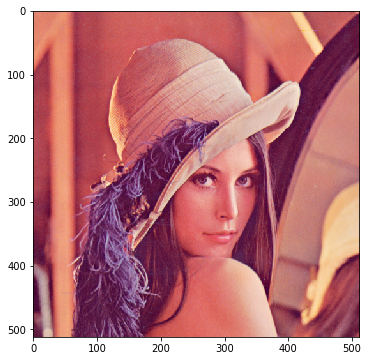

In [3]:
img = cv2.imread("./datas/Lena.png")
imshow("", img)

### 1.1 상하반전

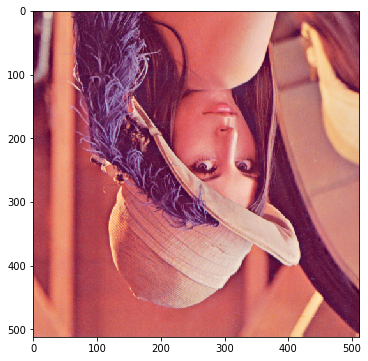

In [4]:
img = cv2.imread("./datas/Lena.png")
img2 = cv2.flip(img, 0) # 1은 좌우 반전, 0은 상하반전 입니다.
imshow("", img2)

### 1.2 좌우반전

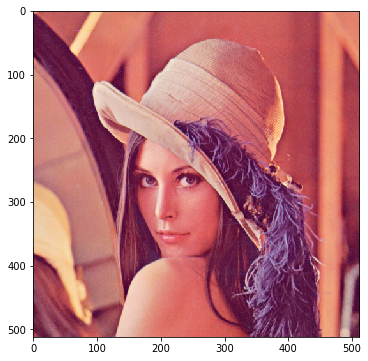

In [5]:
img = cv2.imread("./datas/Lena.png")
img2 = cv2.flip(img, 1) # 1은 좌우 반전, 0은 상하반전 입니다.
imshow("", img2)

### 1.3 Resize

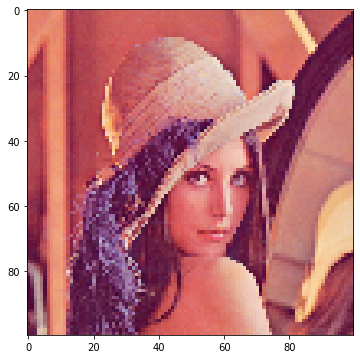

In [6]:
zoom1 = cv2.resize(img, (100, 100), interpolation=cv2.INTER_CUBIC)
imshow("", zoom1)

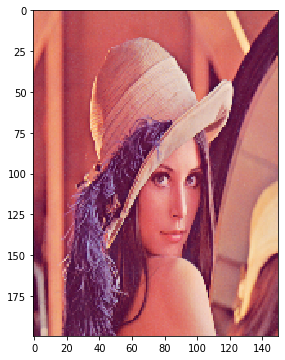

In [7]:
zoom1 = cv2.resize(img, (150, 200), interpolation=cv2.INTER_CUBIC)
imshow("", zoom1)

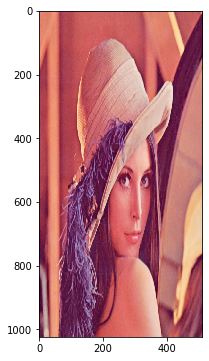

In [8]:
# 원본을 비율로 하려면 하단과 같게하면 된다.
res = cv2.resize(img, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
imshow("", res)

### 1.4 Crop

(200, 310, 3)


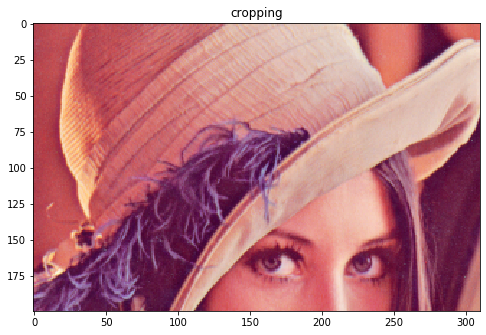

In [9]:
cropping = img[100:300, 100:410] # 3차원 영상이다!
print(cropping.shape)
imshow("cropping", cropping)

### 1.5 이동

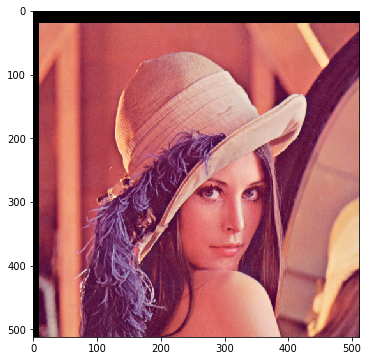

In [10]:
height, width = img.shape[:2]
M = np.float32([
    [1,0,10], # x축으로 10 이동
    [0,1,20]   # y축으로 20 이동
])

dst = cv2.warpAffine(img, M, (width, height))#, borderValue=(255,255,255)# 빈공간을 무슨색으로 채울 것인가)
imshow("", dst)

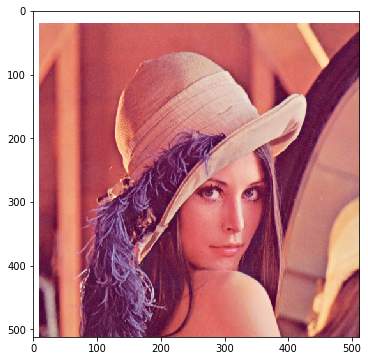

In [11]:
height, width = img.shape[:2]
M = np.float32([
    [1,0,10], # x축으로 10 이동
    [0,1,20]   # y축으로 20 이동
])

# ormantation에서의 빈칸은 이웃픽셀을 보통 사용하여 채운다.
dst = cv2.warpAffine(img, M, (width, height), borderValue=(255,255,255))# 빈공간을 무슨색으로 채울 것인가)
imshow("", dst)

125 137 226


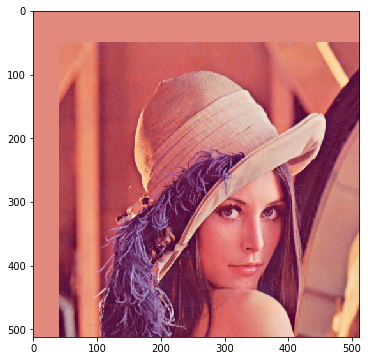

In [12]:
height, width = img.shape[:2]
M = np.float32([
    [1,0,40], # x축으로 10 이동
    [0,1,50]   # y축으로 20 이동
])
c = img[0,0]

print(c[0], c[1], c[2])
# ormantation에서의 빈칸은 이웃픽셀을 보통 사용하여 채운다.
dst = cv2.warpAffine(img, M, (width, height), borderValue=(int(c[0]),int(c[1]),int(c[2])))# 빈공간을 무슨색으로 채울 것인가)
imshow("", dst)

[12, 20, 30]


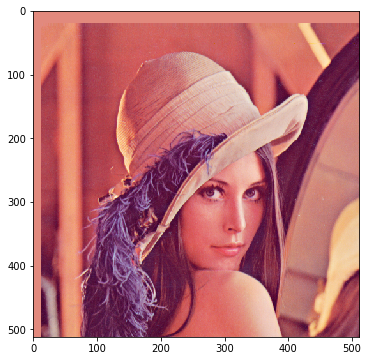

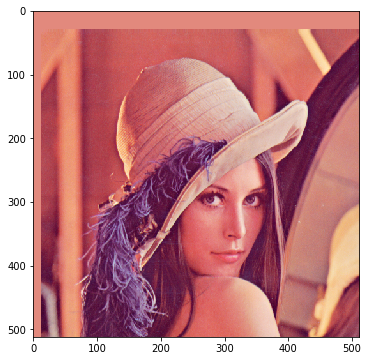

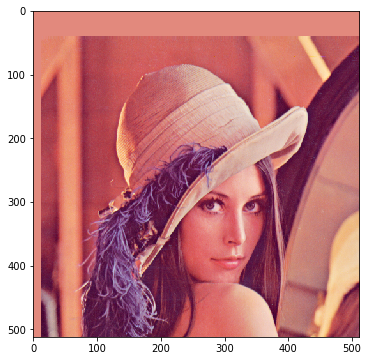

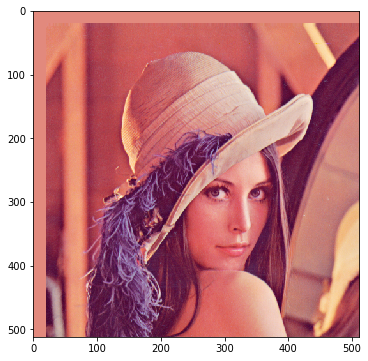

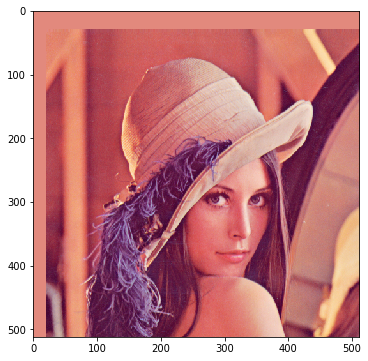

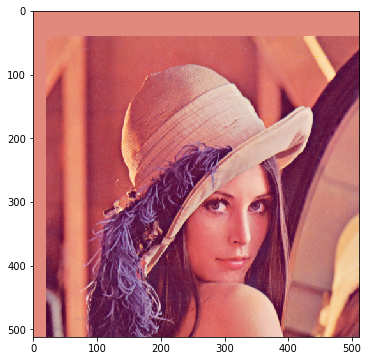

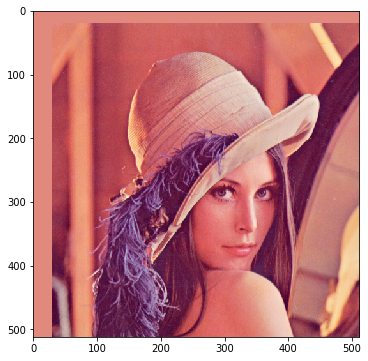

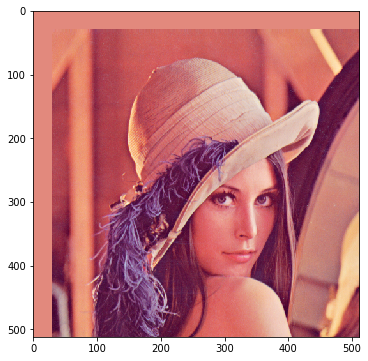

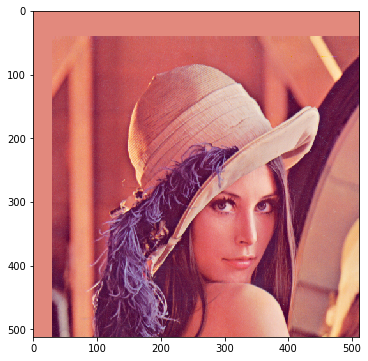

In [13]:
import random

M = []
dx = []
dy = []

dx = [12, 20, 30]
dy = [20, 30, 40]

print(dx)

height, width = img.shape[:2]
for i in dx:
    for j in dy:
        M.append(np.float32([
            [1,0,i], # x축으로 10 이동
            [0,1,j]   # y축으로 20 이동
        ]))

# ormantation에서의 빈칸은 이웃픽셀을 보통 사용하여 채운다.
for i in range(len(M)):
    dst = cv2.warpAffine(img, M[i], (width, height), borderValue=(int(c[0]),int(c[1]),int(c[2])))# 빈공간을 무슨색으로 채울 것인가)
    imshow("", dst)

[217, 185, 130]
[205, 51, 37]


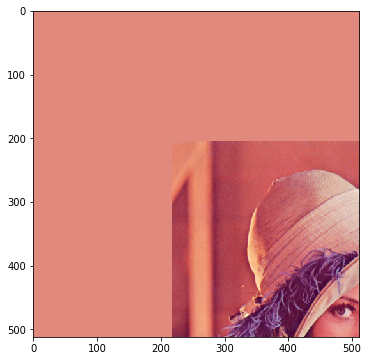

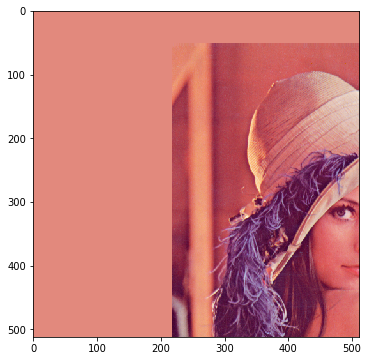

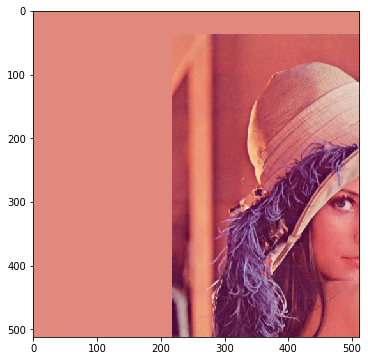

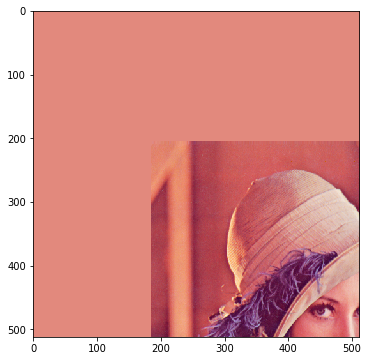

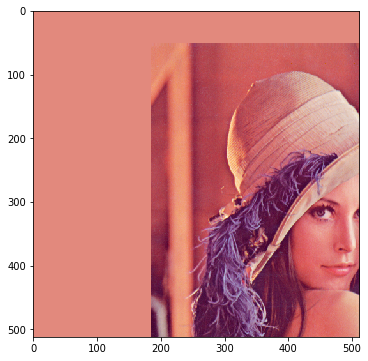

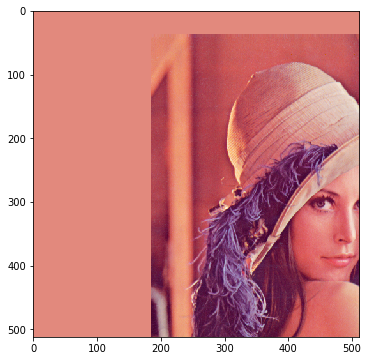

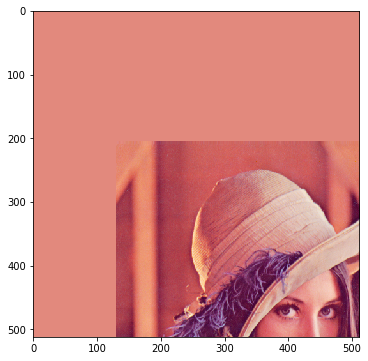

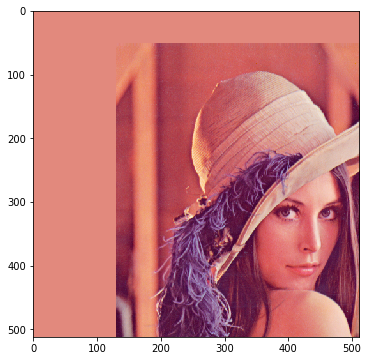

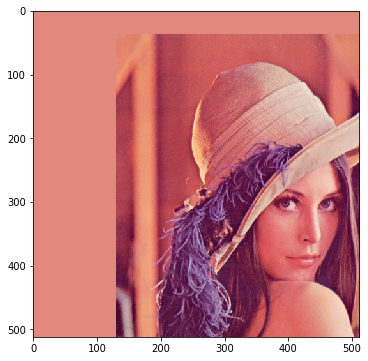

In [14]:
import random

M = []
dx = []
dy = []

for i in range(0, 3): 
    x = random.randint(0,256)    
    y = random.randint(0,256)
    dx.append(x)
    dy.append(y)

print(dx)
print(dy)
height, width = img.shape[:2]
for i in dx:
    for j in dy:
        M.append(np.float32([
            [1,0, i], # x축으로 10 이동
            [0,1, j]   # y축으로 20 이동
        ]))

# ormantation에서의 빈칸은 이웃픽셀을 보통 사용하여 채운다.
for i in range(len(M)):
    dst = cv2.warpAffine(img, M[i], (width, height), borderValue=(int(c[0]),int(c[1]),int(c[2])))# 빈공간을 무슨색으로 채울 것인가)
    imshow("", dst)

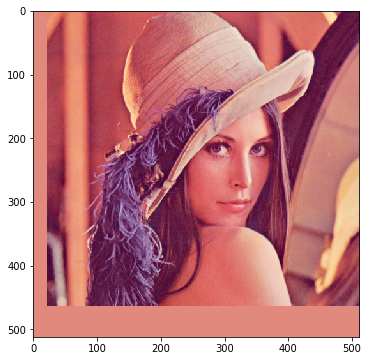

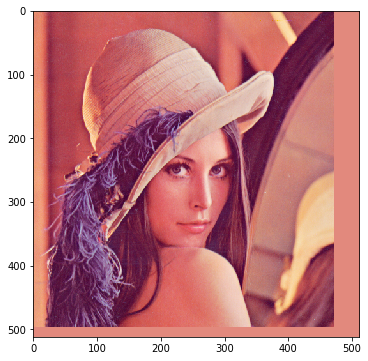

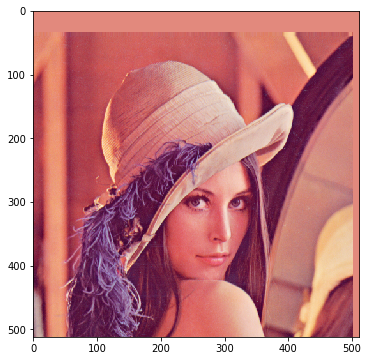

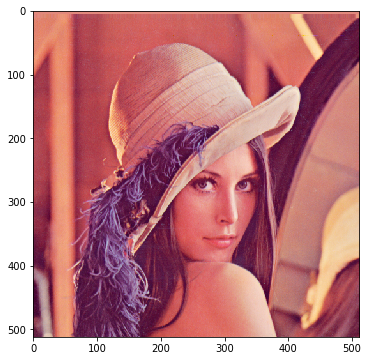

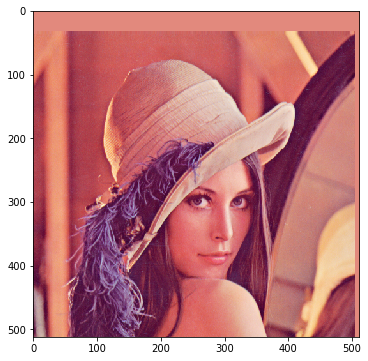

In [15]:
dx = 50
r = np.random.randint(dx*2, size=(5,2)) - dx

M = np.float32([
        [1, 0, 0], # x축으로 10 이동
        [0, 1, 0]   # y축으로 20 이동
    ])


for p in r.tolist():
    M[:,2] = p
    dst = cv2.warpAffine(img, M, (width, height),
                        borderValue=(int(c[0]),int(c[1]),int(c[2])))
    imshow("", dst)

### 1.6 회전

[[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]
(512, 512, 3)


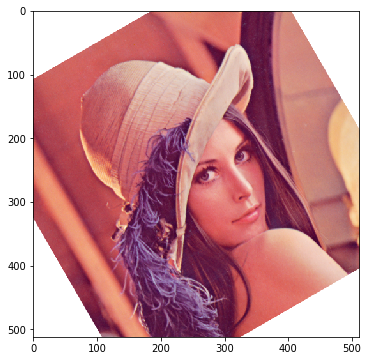

In [16]:
height, width = img.shape[:2]
img_center = (width/2, height/2)
# 반시계 방향으로 45도 회전 회전을 했을 때 스케일 크기
M = cv2.getRotationMatrix2D(img_center, 30, 1.0)
print(M)
rotated_image = cv2.warpAffine(img, M, (width,height), borderValue=(255,255,255))
print(rotated_image.shape)
imshow("", rotated_image)

## cos30 , sin30도, 이동량

[[  0.4330127    0.25        81.14874832]
 [ -0.25         0.4330127  209.14874832]]
(512, 512, 3)


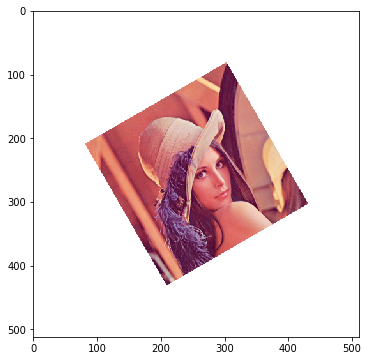

In [17]:
## 회전

height, width = img.shape[:2]
img_center = (width/2, height/2)
# 반시계 방향으로 45도 회전 회전을 했을 때 스케일 크기
M = cv2.getRotationMatrix2D(img_center, 30, 0.5)
print(M)
rotated_image = cv2.warpAffine(img, M, (width,height), borderValue=(255,255,255))
print(rotated_image.shape)
imshow("", rotated_image)

## cos30 , sin30도, 이동량